**importing Library**
-------

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.metrics import silhouette_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_auc_score, roc_curve,precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


# Loading dataset

In [11]:
df = pd.read_csv(r"C:\Users\SK MIANUR RAHAMAN\OneDrive\Desktop\Credit Card Fraud\creditcard\creditcard.csv")

# No of Rows and col

In [12]:
print("Row:" ,df.shape[0],"\nColumn :",df.shape[1])

Row: 284807 
Column : 31


# Columns 

In [13]:
print("Columns name :", df.columns)

Columns name : Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


# Data sample

In [14]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
273354,165560.0,-0.159178,0.982514,-0.129948,-0.818513,0.797664,-0.638614,0.958492,-0.126475,0.186131,...,-0.333805,-0.704057,-0.006994,-0.783188,-0.347471,0.195031,0.355606,0.154370,3.99,0
281841,170455.0,-1.495818,0.268481,0.989245,-1.152161,1.308693,1.291796,0.805100,0.331152,-0.069196,...,0.008459,0.052208,-0.243782,-0.552394,0.521396,0.325262,-0.250069,0.142822,89.95,0
28663,35104.0,0.893342,-0.596836,1.144389,0.840012,-1.196957,-0.093861,-0.542693,0.127559,0.804604,...,0.216013,0.533012,-0.091416,0.466208,0.163761,0.569543,-0.001747,0.044879,131.65,0
149654,91670.0,2.196452,-1.362427,-0.280416,-1.437635,-1.381315,-0.249888,-1.454115,-0.136940,-0.081281,...,-0.496381,-0.743399,0.391387,-0.437921,-0.595208,-0.528237,0.009113,-0.047769,39.95,0
83768,60020.0,0.034773,-1.716849,-0.653822,1.517955,-0.654419,-0.430370,1.057109,-0.360985,-0.041860,...,0.382278,-0.320921,-0.733236,-0.110041,0.518927,-0.363633,-0.109591,0.127126,650.00,0
225453,144256.0,0.843615,-1.763978,-2.577465,1.851695,-0.086458,-1.066236,1.571455,-0.599469,0.089650,...,0.515024,0.228933,-0.628180,-0.056154,0.343251,-0.442665,-0.152176,0.038712,634.20,0
118747,75200.0,1.386975,-0.918443,-1.128332,-1.604891,1.389126,3.452261,-1.089312,0.822621,-0.579244,...,-0.055227,-0.290379,-0.096826,1.032176,0.705223,-0.232473,0.010159,0.012068,42.00,0
133644,80474.0,-1.027958,1.395627,1.081631,1.225659,-0.345666,0.290267,0.240495,0.586622,-0.571186,...,0.092913,0.392894,-0.076011,0.229359,-0.155700,-0.274404,0.047271,0.117393,29.89,0
203711,134932.0,2.006003,-0.137578,-1.018639,0.316498,-0.135234,-0.863616,0.036857,-0.141346,0.343565,...,-0.231924,-0.584272,0.351180,0.005422,-0.369879,0.179994,-0.074072,-0.070955,0.89,0
267767,162920.0,2.184882,-0.892157,-1.482514,-0.971610,-0.522097,-0.860811,-0.474240,-0.095985,-0.360822,...,0.037003,0.002269,0.172191,-0.449300,-0.094254,-0.265421,-0.056901,-0.081831,14.77,0


# dataset statistics

In [15]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data distribution

[]

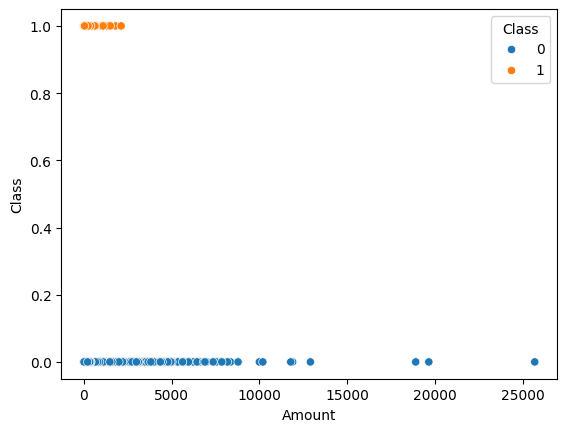

In [16]:
sns.scatterplot(data = df,x = 'Amount',y = 'Class',hue = 'Class')
plt.plot()

# Checking null values

In [17]:
df.isnull().sum().sum()

np.int64(0)

**Imbalanced dataset**
----------

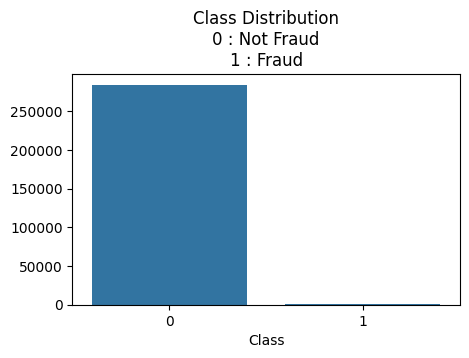

In [18]:
plt.figure(figsize=(5,3))
sns.barplot( x = df['Class'].value_counts().index,
            y = df['Class'].value_counts().values)
plt.title("Class Distribution\n0 : Not Fraud\n1 : Fraud")
plt.show()

In [19]:
print("Not Fraud :",round(df['Class'].value_counts()[0] / len(df) * 100 , 2),"%")
print("Fraud :",round(df["Class"].value_counts()[1] / len(df) * 100 , 2),"%")

Not Fraud : 99.83 %
Fraud : 0.17 %


## Distribution of amount and time

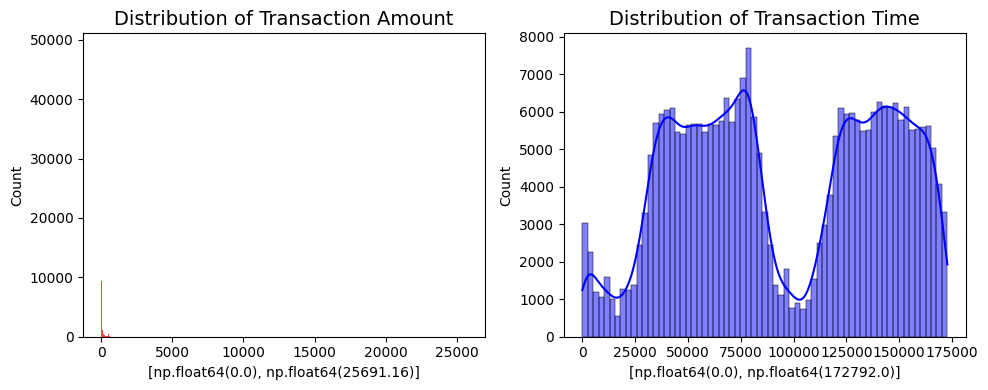

In [20]:
amount_val = df['Amount'].values
time_val = df['Time'].values

plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.histplot(amount_val, color='r',ax = ax1)
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlabel([min(amount_val), max(amount_val)])

ax2 = plt.subplot(1,2,2)
sns.histplot(time_val, color='b',kde = True,ax = ax2)
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlabel([min(time_val), max(time_val)])



plt.tight_layout()
plt.show()

### Checking correlation between features

In [79]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


### Splitting training and testing data

In [25]:
X = df.iloc[:,:-1]
Y = df['Class']


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X , Y , random_state = 42 , test_size = 0.2 , stratify = Y )

## **Scaling**

In [27]:
amount_feature = ["Amount"]
time_feature = ['Time']
preprocess = ColumnTransformer(
    transformers = [
        ('Scaled_Time',StandardScaler(),time_feature),
        ("Scaled_Amount",RobustScaler(),amount_feature)
    ],
    remainder = 'passthrough'
)

--------------------------------------------------------------------------------------------
**XgBoost**
------------------

In [28]:
xgb = XGBClassifier()


*Pipeline (scaling -> balancing dataset -> training model) for XgBoost*


In [31]:
pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("classifier", xgb)
])

*hyper-parameter tuning using Grid serach CV*

In [ ]:
negative = sum(y_train == 0)
positive = sum(y_train == 1)
weight = negative / positive
param_grid = {
    'classifier__n_estimators': [ 700, 750 ],
    'classifier__max_depth': [ 12, 16],
    'classifier__learning_rate': [  0.03, 0.05 ],
    'classifier__subsample': [0.9],
    'classifier__colsample_bytree': [0.8],
    'classifier__scale_pos_weight' : [weight,55]
}

    
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)


In [35]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaled_Time',
                                                                         StandardScaler(),
                                                                         ['Time']),
                                                                        ('Scaled_Amount',
                                                                         RobustScaler(),
                                                                         ['Amount'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=No...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8],
                         'classifier__learning_rate': [0.03, 0.05],
                         'classifier__max_depth': [12, 16],
                         'classifier__n_estimators': [700, 750],
                         'classifier__scale_pos_weight': [577.2868020304569,
                                                          55],
                         'classifier__subsample': [0.9]},
             scoring='roc_auc', verbose=2)

*best parameters for XgBoost*

In [38]:
print(grid.best_params_)
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:,1]


{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.03, 'classifier__max_depth': 16, 'classifier__n_estimators': 750, 'classifier__scale_pos_weight': 55, 'classifier__subsample': 0.9}


*Confusion Matrix for XgBoost*

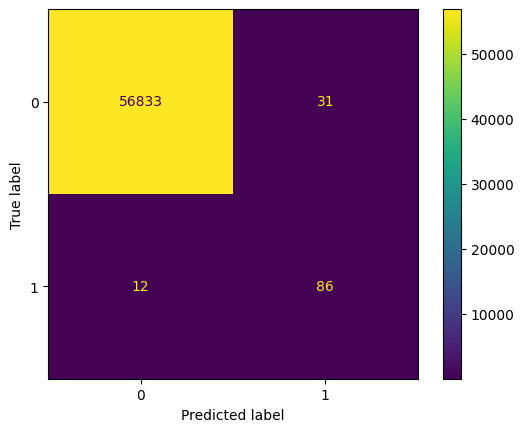

In [68]:
cm_xgb = confusion_matrix(y_test,y_pred)
disp_xgb = ConfusionMatrixDisplay(cm_xgb)
disp_xgb.plot()

[]

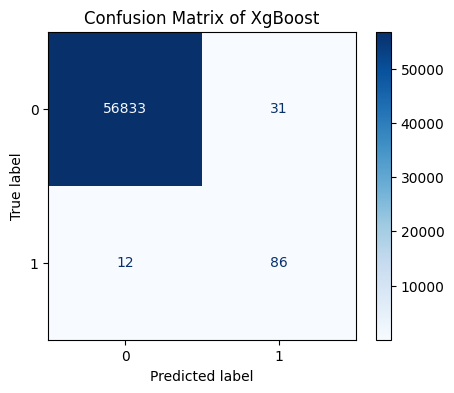

In [69]:
fig, ax = plt.subplots(figsize=(5,4))
disp_xgb.plot(ax=ax, cmap="Blues")

plt.title("Confusion Matrix of XgBoost")
plt.savefig("Confusion_matrix_xgb.jpg",dpi=300, bbox_inches='tight')
plt.plot()

*Precision-Recall Curve*

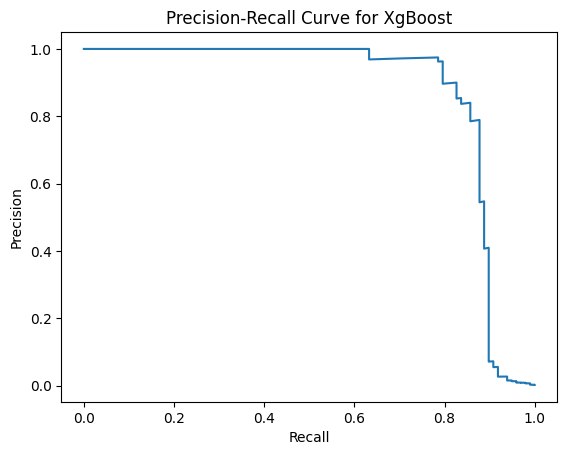

In [84]:
precision, recall, thresholds = precision_recall_curve(
    y_test, y_proba
)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for XgBoost")
plt.show()

*ROC-AUC curve and Score*

AUC ROC: 0.9813245782274643


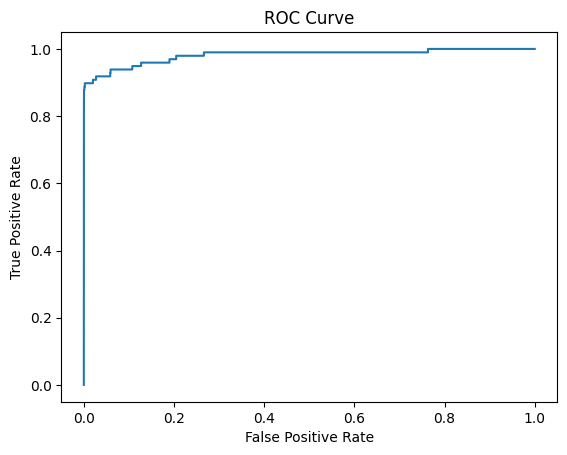

In [ ]:
auc_xgb = roc_auc_score(y_test, y_proba)
print("AUC ROC:", auc_xgb)

fpr, tpr, th = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve XgBoost")
plt.show()

*Threshold*

In [81]:
thresholds = np.arange(0.1, 0.9,0.01)
scores_xgb = []

for t in thresholds:
    y_temp = (y_proba >= t).astype(int)
    scores_xgb.append(f1_score(y_test, y_temp))

best_t = thresholds[np.argmax(scores_xgb)]
best_f1 = max(scores_xgb)

print("Best Threshold for XgBoost:", best_t)
print("Best F1 Score for XgBoost:", best_f1)

Best Threshold for XgBoost: 0.8799999999999996
Best F1 Score for XgBoost: 0.8484848484848485


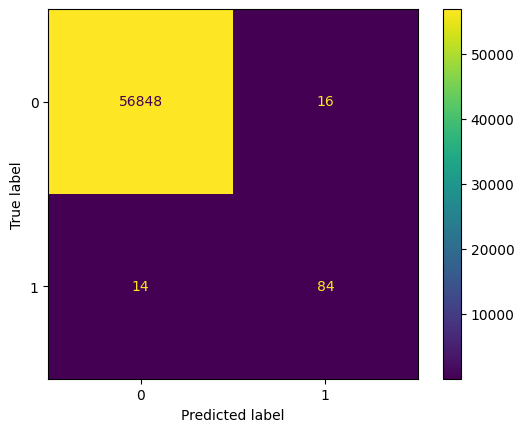

In [92]:
y_pred_thres_xgb = (y_proba >= best_t).astype(int)
cm_xgb = confusion_matrix(y_test,y_pred_thres_xgb)
disp_xgb = ConfusionMatrixDisplay(cm_xgb)
disp_xgb.plot()

------------------------------------------------------------
**Random Forest**
--------------------------------------------------------------

In [29]:
rf = RandomForestClassifier()

*Random Forest Pipeline*

In [32]:
pipeline2 = Pipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("classifier", rf)
])

*Hyper-parameter Tuning*

In [78]:
from sklearn.model_selection import RandomizedSearchCV

rf_param = {
    "classifier__n_estimators": [200, 400, 600],
    "classifier__max_depth": [10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 3],
    "classifier__class_weight": ["balanced", "balanced_subsample"]
}

rf_random = RandomizedSearchCV(
    estimator=pipeline2,
    param_distributions=rf_param,
    n_iter=10,           # Only test 10 combinations (very fast)
    scoring="f1",
    n_jobs=-1,
    cv=3,                # Reduce CV folds for speed
    verbose=2,
    random_state=42
)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaled_Time',
                                                                               StandardScaler(),
                                                                               ['Time']),
                                                                              ('Scaled_Amount',
                                                                               RobustScaler(),
                                                                               ['Amount'])])),
                                             ('smote', SMOTE(random_state=42)),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__class_weight': ['balanced',
                                                                     'balanced_subsample'],
                                        'classifier__max_depth': [10, 20, 30],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         3],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [200, 400,
                                                                     600]},
                   random_state=42, scoring='f1', verbose=2)

*Best Parameter for Random Forest*

In [40]:
print(rf_random.best_params_)
y_pred_rf = rf_random.predict(X_test)
y_proba_rf = rf_random.predict_proba(X_test)[:,1]

{'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 30, 'classifier__class_weight': 'balanced_subsample'}


*Confusion Matrix for Random Forest*

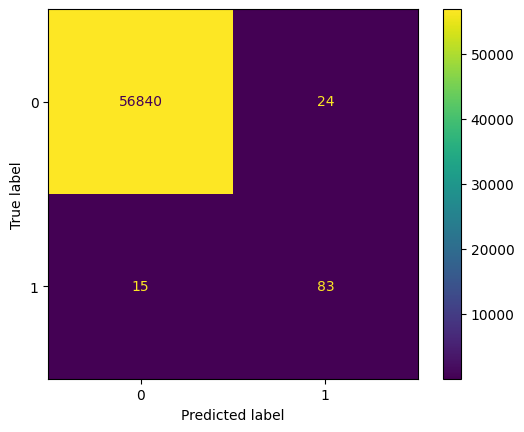

In [66]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf)
disp_rf.plot()

[]

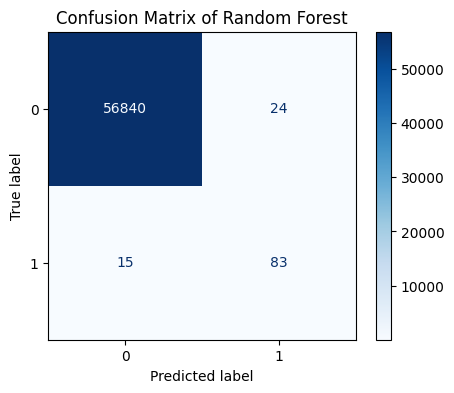

In [67]:
fig, ax = plt.subplots(figsize=(5,4))
disp_rf.plot(ax=ax, cmap="Blues")

plt.title("Confusion Matrix of Random Forest")
plt.savefig("Confusion_matrix_rf.jpg",dpi=300, bbox_inches='tight')
plt.plot()

*Precision-Recall Curve*

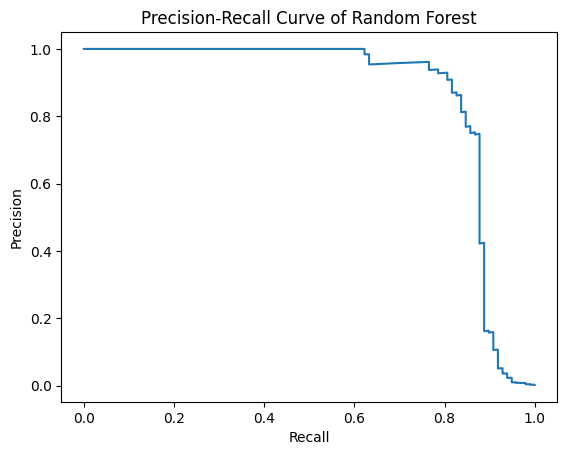

In [85]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, y_proba_rf
)

plt.plot(recall_rf, precision_rf)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve of Random Forest")
plt.show()

*ROC-AUC Curve and Score*

AUC ROC: 0.9800131785972689


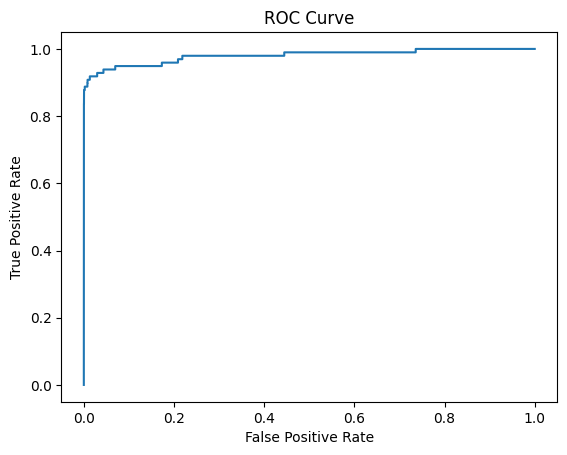

In [ ]:
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("AUC ROC:", auc_rf)

fpr, tpr, th = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Random Forest")
plt.show()

*Threshold*

In [82]:
thresholds = np.arange(0.1, 0.9,0.01)
scores_rf = []

for t in thresholds:
    y_temp = (y_proba_rf >= t).astype(int)
    scores_rf.append(f1_score(y_test, y_temp))

best_t_rf = thresholds[np.argmax(scores_rf)]
best_f1_rf = max(scores_rf)

print("Best Threshold Random Forest:", best_t_rf)
print("Best F1 Score Random Forest:", best_f1_rf)

Best Threshold Random Forest: 0.8899999999999996
Best F1 Score Random Forest: 0.851063829787234


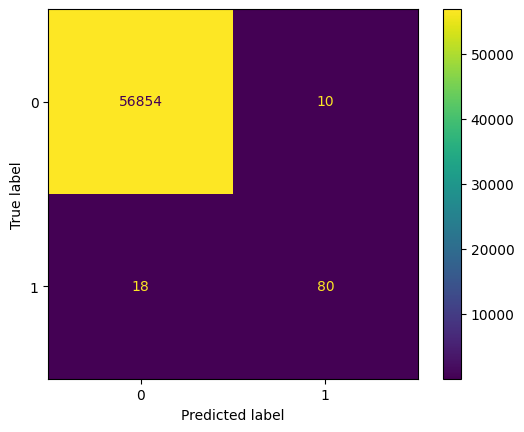

In [91]:
y_pred_thres_rf = (y_proba_rf >= best_t_rf).astype(int)
cm_rf = confusion_matrix(y_test,y_pred_thres_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf)
disp_rf.plot()

--------------------------------------------------------------------------------
**Logistic Regression**
--------------------------------------------------------------------------------

In [47]:
lr = LogisticRegression()

*Pipeline*

In [48]:
pipeline3 = Pipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("classifier", lr)
])

*Hyper_parameter Tuning*

In [50]:
lr_param_grid = {
    "classifier__penalty": ["l1", "l2", "elasticnet"],
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__solver": ["saga"],
    "classifier__l1_ratio": [0, 0.5, 1],
    "classifier__class_weight": ["balanced"],
    "classifier__max_iter": [500, 1000]  # add more for stability
}

lr_grid = RandomizedSearchCV(
    estimator=pipeline3,
    param_distributions=lr_param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
    n_iter=10,        # random search requires n_iter
    random_state=42
)
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaled_Time',
                                                                               StandardScaler(),
                                                                               ['Time']),
                                                                              ('Scaled_Amount',
                                                                               RobustScaler(),
                                                                               ['Amount'])])),
                                             ('smote', SMOTE(random_state=42)),
                                             ('classifier',
                                              LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'classifier__C': [0.01, 0.1, 1, 10],
                                        'classifier__class_weight': ['balanced'],
                                        'classifier__l1_ratio': [0, 0.5, 1],
                                        'classifier__max_iter': [500, 1000],
                                        'classifier__penalty': ['l1', 'l2',
                                                                'elasticnet'],
                                        'classifier__solver': ['saga']},
                   random_state=42, scoring='f1', verbose=2)

*Logistic Reegression Best Parameter*

In [51]:
print(lr_grid.best_params_)
y_pred_lr = lr_grid.predict(X_test)
y_proba_lr = lr_grid.predict_proba(X_test)[:,1]

{'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__max_iter': 500, 'classifier__l1_ratio': 0, 'classifier__class_weight': 'balanced', 'classifier__C': 0.01}


*Confusion Matrix*

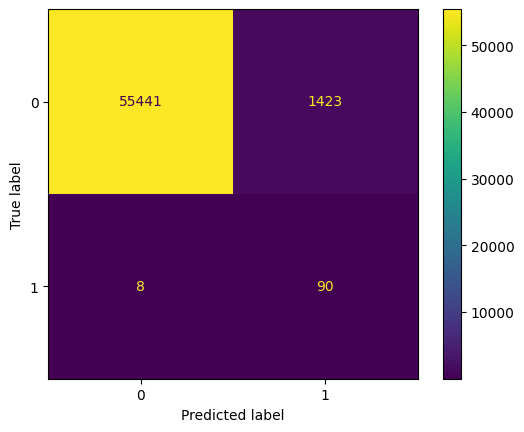

In [70]:
cm_lr = confusion_matrix(y_test,y_pred_lr)
disp_lr = ConfusionMatrixDisplay(cm_lr)
disp_lr.plot()

[]

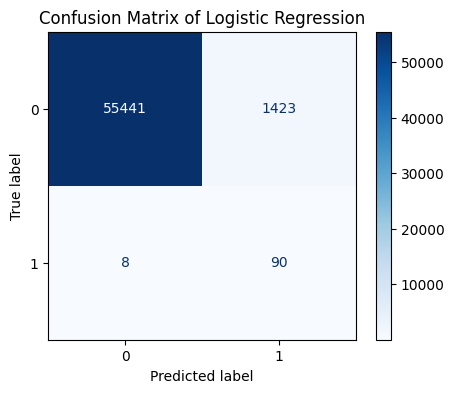

In [71]:
fig, ax = plt.subplots(figsize=(5,4))
disp_lr.plot(ax=ax, cmap="Blues")

plt.title("Confusion Matrix of Logistic Regression")
plt.savefig("Confusion_matrix_lr.jpg",dpi=300, bbox_inches='tight')
plt.plot()

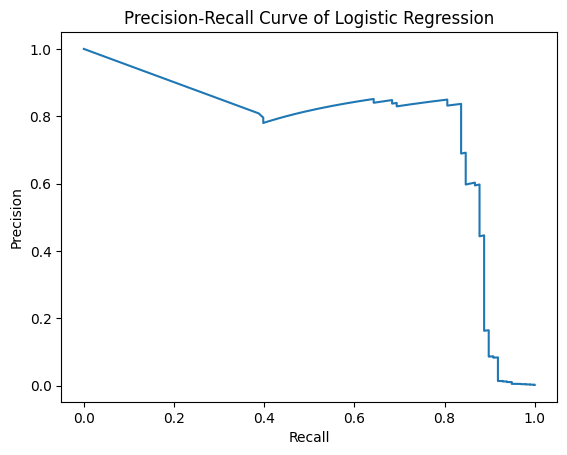

In [86]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(
    y_test, y_proba_lr
)

plt.plot(recall_lr, precision_lr)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve of Logistic Regression")
plt.show()

*ROC-AUC Curve and Score*

AUC ROC: 0.9716621577584326


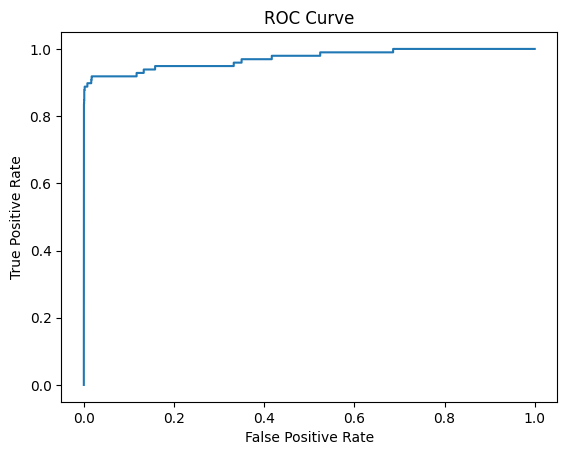

In [ ]:
auc_lr = roc_auc_score(y_test, y_proba_lr)
print("AUC ROC:", auc_lr)

fpr, tpr, th = roc_curve(y_test, y_proba_lr)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Logistic Regression")
plt.show()

*Threshold*

In [80]:
thresholds = np.arange(0.1, 0.9,0.01)
scores_lr = []

for t in thresholds:
    y_temp = (y_proba_lr >= t).astype(int)
    scores_lr.append(f1_score(y_test, y_temp))

best_t_lr = thresholds[np.argmax(scores_lr)]
best_f1_lr = max(scores_lr)

print("Best Threshold for Logistic Regression:", best_t_lr)
print("Best F1 Score for Logistic Regression:", best_f1_lr)

Best Threshold for Logistic Regression: 0.8899999999999996
Best F1 Score for Logistic Regression: 0.3175182481751825


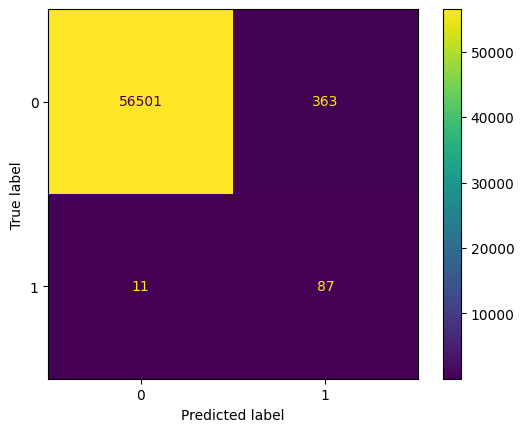

In [88]:
y_pred_thres = (y_proba_lr >= best_t_lr).astype(int)
cm_lr = confusion_matrix(y_test,y_pred_thres)
disp_lr = ConfusionMatrixDisplay(cm_lr)
disp_lr.plot()

----------------------------------------------------------------------------------------------

**Summary of three Models**
-------------

In [74]:
summary = pd.DataFrame({
    "XgBoost": cm_xgb.ravel(),
    "Random Forest": cm_rf.ravel(),
    "Logistic Regression": cm_lr.ravel()
}, index=["TN", "FP", "FN", "TP"])

print(summary)

    XgBoost  Random Forest  Logistic Regression
TN    56833          56840                55441
FP       31             24                 1423
FN       12             15                    8
TP       86             83                   90


In [83]:
score_summary = pd.DataFrame({
    "XgBoost":[best_t,best_f1],
    "Random Forest":[best_t_rf,best_f1_rf],
    "Logistic Regression":[best_t_lr,best_f1_lr]
},index = ["Threshold","F1 Score"])
print(score_summary)

            XgBoost  Random Forest  Logistic Regression
Threshold  0.880000       0.890000             0.890000
F1 Score   0.848485       0.851064             0.317518


-----------------------------------upto this-----------------------------

**Saving the Model**
------------

*XgBoost*

In [96]:
import joblib
joblib.dump({"model": grid.best_estimator_, "threshold": best_t}, "Fraud_model_xgb.pkl")
print("XgBoost Model saved successfully!")

XgBoost Model saved successfully!


*Random Forest*

In [97]:
joblib.dump({"model": rf_random.best_estimator_, "threshold": best_t_rf}, "Fraud_model_rf.pkl")

print("Random Forest Model saved successfully!")

Random Forest Model saved successfully!


*Logistic Regression*

In [98]:

joblib.dump({"model": lr_grid.best_estimator_, "threshold": best_t_lr}, "Fraud_model_lr.pkl")

print("Logistic Regression Model saved successfully!")

Logistic Regression Model saved successfully!
